In [77]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB

In [79]:

df = pd.read_csv(
    "worst_cells.csv",
    sep=";",
    decimal=","
)


In [81]:
df.head()

,cellule,charge_CCE,charge_PRB,CQI,débit,NBR_UE,Trafic,congested,rsrp,sinr,bler_dl,ho_success_rate,ue_speed,call_drop_rate_pct,status
0,1,13.628117,5.0,10.960715,0.134373,0.877257,0.000028,0,-86.88,0.95,14.39,95,30.5,1.95,BAD_HANDOVER
1,2,67.187072,90.0,7.732582,0.224501,7.479492,0.720455,0,-98.06,1.84,13.74,98,35.8,3.89,CONGESTED
2,3,78.526777,61.0,7.693118,0.226521,16.639801,1.617532,0,-97.64,0.01,15.00,98,85.0,2.97,CONGESTED
3,4,3.518277,5.0,9.264000,0.244049,0.996700,0.000006,0,-100.36,1.68,12.07,95,26.0,1.90,BAD_HANDOVER
4,5,57.793288,95.0,8.590487,0.274156,7.886607,0.927139,0,-90.67,0.89,11.76,98,59.5,4.11,HIGH_DROP_RATE


In [85]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21139 entries, 0 to 21138
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cellule             21139 non-null  int64  
 1   charge_CCE          21139 non-null  float64
 2   charge_PRB          21139 non-null  float64
 3   CQI                 21139 non-null  float64
 4   débit               21139 non-null  float64
 5   NBR_UE              21139 non-null  float64
 6   Trafic              21139 non-null  float64
 7   congested           21139 non-null  int64  
 8   rsrp                21139 non-null  float64
 9   sinr                21139 non-null  float64
 10  bler_dl             21139 non-null  float64
 11  ho_success_rate     21139 non-null  int64  
 12  ue_speed            21139 non-null  float64
 13  call_drop_rate_pct  21139 non-null  float64
 14  status              21139 non-null  object 
dtypes: float64(11), int64(3), object(1)
memory usage: 2.4

,cellule,charge_CCE,charge_PRB,CQI,débit,NBR_UE,Trafic,congested,rsrp,sinr,bler_dl,ho_success_rate,ue_speed,call_drop_rate_pct
count,21139.000000,21139.000000,21139.000000,21139.000000,21139.000000,21139.000000,2.113900e+04,21139.000000,21139.000000,21139.000000,21139.000000,21139.000000,21139.000000,21139.000000
mean,10570.000000,19.031525,30.310844,10.347346,10.573684,1.742004,2.042646e+00,0.015989,-94.971079,1.511708,12.361724,97.414069,60.567047,2.029334
std,6102.448006,13.936527,23.466855,1.572670,7.015750,1.702641,2.012317e+00,0.125437,5.005970,1.908474,1.935130,1.183525,34.738718,0.638069
min,1.000000,3.173520,5.000000,2.165126,0.134373,0.275412,4.770000e-07,0.000000,-114.640000,-6.140000,2.350000,95.000000,0.000000,0.560000
25%,5285.500000,7.889915,11.500000,9.285550,5.730582,1.065225,5.764039e-01,0.000000,-98.350000,0.200000,11.060000,97.000000,30.300000,1.620000
50%,10570.000000,14.439275,22.666667,10.297361,9.222566,1.229497,1.396661e+00,0.000000,-94.960000,1.510000,12.490000,98.000000,60.900000,1.870000
75%,15854.500000,26.963824,43.166667,11.387772,13.710719,1.655166,2.914324e+00,0.000000,-91.620000,2.800000,13.950000,98.000000,90.550000,2.220000
max,21139.000000,78.526777,95.000000,14.983310,90.317261,68.497484,2.642225e+01,1.000000,-74.160000,10.540000,15.000000,100.000000,120.000000,4.960000


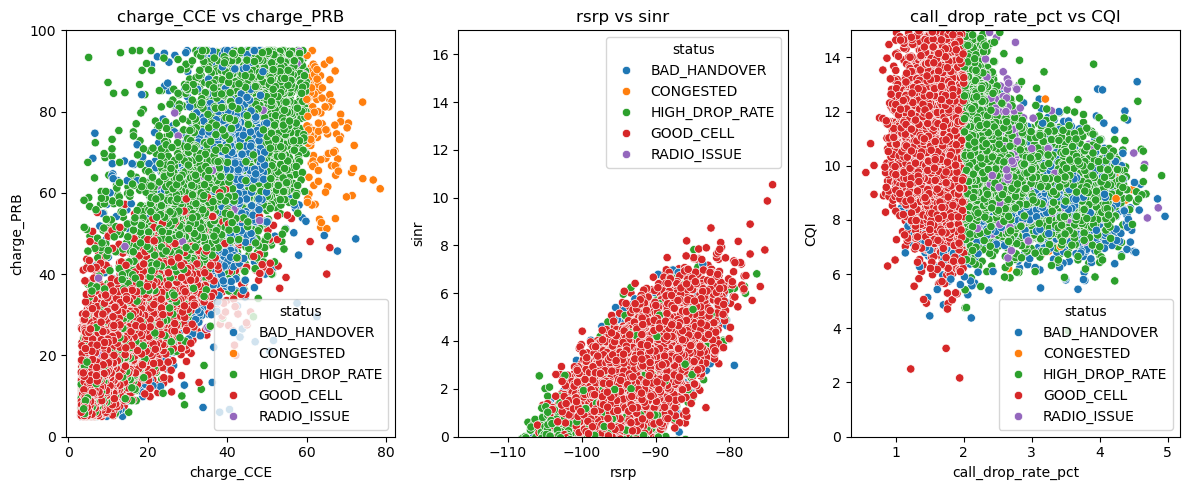

In [87]:
import seaborn as sns
df.columns = df.columns.str.strip()

fig, ax = plt.subplots(1,3,figsize=(12,5))

sns.scatterplot(data=df, x='charge_CCE', y='charge_PRB', hue='status', ax=ax[0])
ax[0].set_ylim(0, 100)
ax[0].set_title("charge_CCE vs charge_PRB")
sns.scatterplot(data=df, x='rsrp', y='sinr', hue='status', ax=ax[1])
ax[1].set_ylim(0, 17)
ax[1].set_title("rsrp vs sinr")
sns.scatterplot(data=df, x='call_drop_rate_pct', y='CQI', hue='status', ax=ax[2])
ax[2].set_ylim(0, 15)
ax[2].set_title("call_drop_rate_pct vs CQI")

plt.tight_layout()
plt.show()

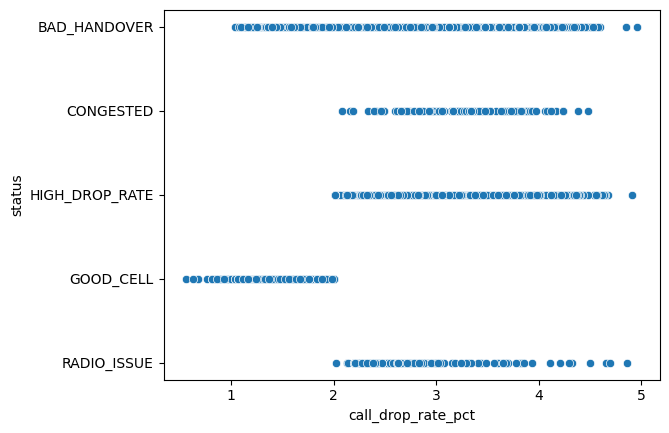

In [91]:
sns.scatterplot(x='call_drop_rate_pct', y='status', data=df)
plt.show()

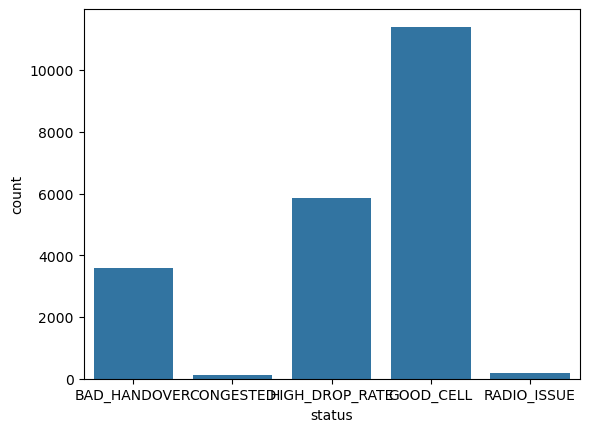

In [93]:
sns.countplot(x='status', data=df)
plt.show()

In [95]:
df.isnull().sum()

cellule               0
charge_CCE            0
charge_PRB            0
CQI                   0
débit                 0
NBR_UE                0
Trafic                0
congested             0
rsrp                  0
sinr                  0
bler_dl               0
ho_success_rate       0
ue_speed              0
call_drop_rate_pct    0
status                0
dtype: int64

In [97]:
df.isna().sum()

cellule               0
charge_CCE            0
charge_PRB            0
CQI                   0
débit                 0
NBR_UE                0
Trafic                0
congested             0
rsrp                  0
sinr                  0
bler_dl               0
ho_success_rate       0
ue_speed              0
call_drop_rate_pct    0
status                0
dtype: int64

In [99]:
X =pd.DataFrame(np.c_[df['charge_CCE'], df['charge_PRB'],df['rsrp'],df['sinr'],df['ho_success_rate'],df['call_drop_rate_pct']],
                columns=['charge_CCE','charge_PRB', 'rsrp','sinr','ho_success_rate','call_drop_rate_pct'],)
y=df.status
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled=scaler.fit_transform(X)

In [101]:
x_train,x_test,Y_train,Y_test= train_test_split(X,y,test_size=0.3,random_state=5)

In [103]:
models= { "Logestic Regression": LogisticRegression(),
    "SVM":SVC(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-nearest Neighbors": KNeighborsClassifier(),
     "Naive Bayes": GaussianNB()
        }
         
         

In [105]:
results = {}
for model_name,model in models.items():
    print(f"training {model_name})...")
    model.fit(x_train,Y_train)
    y_pred= model.predict(x_test)
    accuracy= metrics.accuracy_score(Y_test,y_pred)
    results[model_name]=accuracy
    print(f"(model_name) accuracy : {accuracy}")

training Logestic Regression)...


C:\Users\Imad\anaconda3\envs\wqu\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(model_name) accuracy : 0.7254809208451592
training SVM)...
(model_name) accuracy : 0.8935666982024598
training Random Forest)...
(model_name) accuracy : 0.9996846420687481
training Decision Tree)...
(model_name) accuracy : 0.9995269631031221
training K-nearest Neighbors)...
(model_name) accuracy : 0.8848943550930306
training Naive Bayes)...
(model_name) accuracy : 0.9096499526963103


In [109]:
sorted_results = sorted(results.items(),key=lambda x: x[1],reverse=True)
print("\nmodel comparaison ( accuracy)")
for model_name, accuracy in sorted_results:
    print(f"{model_name}: {accuracy:4f}")


model comparaison ( accuracy)
Random Forest: 0.999685
Decision Tree: 0.999527
Naive Bayes: 0.909650
SVM: 0.893567
K-nearest Neighbors: 0.884894
Logestic Regression: 0.725481


In [111]:
#hpyer paramters tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, Y_train)
print(f"Best parameters for Random Forest: {grid_search.best_params_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Random Forest: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 100}


In [112]:
best_model = grid_search.best_estimator_
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5)
print(f"Cross-validation scores for Random Forest: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

Cross-validation scores for Random Forest: [0.99645222 0.99834437 0.99976348 1.         1.        ]
Mean cross-validation score: 0.9989120151371808


In [113]:
from sklearn.metrics import classification_report


# Classification report with zero_division parameter to handle undefined precision
y_pred = best_model.predict(x_test)
print("\nClassification Report:")
print(classification_report(Y_test, y_pred, zero_division=1))


Classification Report:
                precision    recall  f1-score   support

  BAD_HANDOVER       1.00      1.00      1.00      1062
     CONGESTED       1.00      0.91      0.95        32
     GOOD_CELL       1.00      1.00      1.00      3468
HIGH_DROP_RATE       1.00      1.00      1.00      1735
   RADIO_ISSUE       0.98      1.00      0.99        45

      accuracy                           1.00      6342
     macro avg       1.00      0.98      0.99      6342
  weighted avg       1.00      1.00      1.00      6342



In [127]:
import joblib

# Save the best model (Random Forest with Hyperparameter Tuning)
joblib.dump(best_model, 'Cell_Anomaly_Classifier.pkl')

# Save the scaler (MinMax SScaler used for feature scaling)
joblib.dump(scaler, 'scaler.pkl')

print("Model and Scaler have been saved.")


Model and Scaler have been saved.


In [129]:
#load the saved model 
load_model =joblib.load('Cell_Anomaly_Classifier.pkl')
new_data = np.array([[100,100,-70,-1,99,3]])
new_data=pd.DataFrame(new_data,columns=['charge_CCE','charge_PRB','rsrp','sinr','ho_success_rate','call_drop_rate_pct'])
single_prediction = load_model.predict(new_data)
print(f"the predicted state for this cell is :{single_prediction[0]}")

the predicted state for this cell is :CONGESTED


In [131]:
import os, time, hashlib

MODEL_PATH = "Cell_Anomaly_Classifier.pkl"  # EXACTEMENT le même nom que ton notebook
print("MODEL_PATH =", os.path.abspath(MODEL_PATH))
print("MODEL_MTIME =", time.ctime(os.path.getmtime(MODEL_PATH)))
print("MODEL_SIZE  =", os.path.getsize(MODEL_PATH))

with open(MODEL_PATH, "rb") as f:
    print("MODEL_MD5   =", hashlib.md5(f.read()).hexdigest())

MODEL_PATH = C:\Users\Imad\Cell_Anomaly_Classifier.pkl
MODEL_MTIME = Thu Jan 29 15:08:02 2026
MODEL_SIZE  = 1404033
MODEL_MD5   = 555eda9d0895ed98c47ffd542abd5871
